In [26]:
import pandas as pd
import numpy as np
# nltk - natural langauge processing
# wordcloud - for drawing word cloud
# matplotlib - for charting
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import stylecloud
from PIL import Image

## Read from CSV

In [6]:
data = pd.read_csv(r'profileScraperMAIN.csv', encoding='utf-8')
data = data.replace(np.nan, 'NO ENTRY', regex=True)
data.drop_duplicates(subset = "linkedinProfile", keep = "first", inplace = True) # keep the 1st instance of the duplicate
data = data.iloc[:, [3,19, 21, 23, 25, 28, 45, 46, 48, 50]]
data.head(10)

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
0,Ngee Ann Polytechnic,Vieworks,Sales And Marketing Representative,Ngee Ann Polytechnic,Republic Polytechnic,"Sales Management, Marketing, Business Developm...",NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY
1,General Education Officer at Ministry of Educa...,"Ministry of Education, Singapore",General Education Officer,Nanyang Technological University Singapore,National University of Singapore,"Teaching, Curriculum Design, Teacher Training,...",Stepping Stone Student Care,Teacher,"Postgraduate Diploma in Education (Merit), His...","Bachelor of Arts, History, English Studies, Ch..."
2,--,IPC Group Singapore,Business Development Executive,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
5,Talent Sourcer - Tech & PM | Join Us!,Shopee,"Associate, People Team",RMIT University,Temasek Polytechnic,NO ENTRY,PERSOLKELLY Singapore,Recruitment Consultant,"Bachelor's degree, Business Management","Diploma, Integrated Facilities Management"
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
7,🌻,UBS,Data & Document Specialist,National University of Singapore,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,"Bachelor of Science (Hons.), Statistics with S...",NO ENTRY
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
9,DIY Hacker | SUTD - SMU Double Degree Undergra...,Smartcademy,Introduction to User Experience Design,Singapore University of Technology and Design ...,Singapore Management University,"Microsoft Office, Mechanical Engineering, CAD,...",Micron Technology,Test Equipment Engineer,"Bachelor of Engineering - BE, Engineering","Bachelor of Business Management - BBM, Busines..."


## Latest School is SMU and from SCIS / SIS

In [7]:
searchfor = ['Singapore Management University', 'SMU', 'School of Computing and Information Systems',
             'School of Information Systems', 'SCIS', 'SIS','SMU SCIS', 'SMU SIS','SMU-SCIS', 'SMU-SIS']
latest_SMU = data[data['school'].str.contains('|'.join(searchfor))]
latest_SMU.head()

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
10,Data Scientist at Seagate,Seagate Technology,Data Scientist,Singapore Management University,Temasek Polytechnic,"Interpersonal Skills, PHP, Problem Solving, Ta...",Seagate Technology,Data Science Intern,"Bachelor of Science (Information Systems), Bus...","Diploma in Business, Business Administration a..."


In [8]:
searchfor = ['IS', 'SMT', 'CS','Information Systems', 'Information-Systems', 'Smart-City','Smart City','Computer Science', 'Computer-Science']
IS_SMU = latest_SMU[latest_SMU['schoolDegree'].str.contains('|'.join(searchfor))]
IS_SMU.head()

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
10,Data Scientist at Seagate,Seagate Technology,Data Scientist,Singapore Management University,Temasek Polytechnic,"Interpersonal Skills, PHP, Problem Solving, Ta...",Seagate Technology,Data Science Intern,"Bachelor of Science (Information Systems), Bus...","Diploma in Business, Business Administration a..."


In [9]:
IS_SMU.shape

(67, 10)

<AxesSubplot:title={'center':'Previous Schools before SMU SCIS'}, xlabel='Previous Schools', ylabel='Count'>

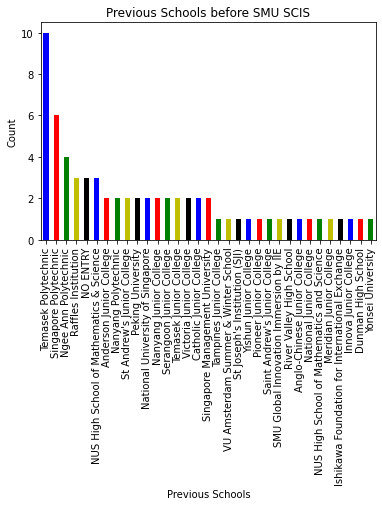

In [10]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(IS_SMU)))
IS_SMU.groupby(IS_SMU['school2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Previous Schools before SMU SCIS',
                                      xlabel = 'Previous Schools',
                                      ylabel = 'Count')

<AxesSubplot:title={'center':'Previous Certifications before SMU SCIS'}, xlabel='Previous Certs', ylabel='Count'>

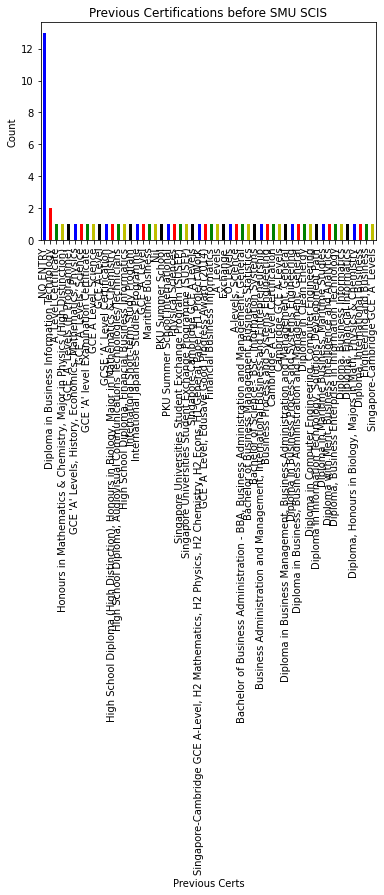

In [11]:
IS_SMU.groupby(IS_SMU['schoolDegree2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Previous Certifications before SMU SCIS',
                                      xlabel = 'Previous Certs',
                                      ylabel = 'Count')

## Skillsets

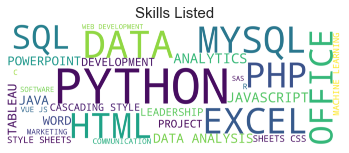

In [51]:
# Find out what skills SMU students already have
# X-Ref with Job Street
# Similarities = Push, Difference = Potential to push for outreach

stop_words = stopwords.words('english')
stop_words.extend(['programming language', 'programming', 'language', 'microsoft', 'business', 'management'])

content = ''
for x in IS_SMU['allSkills']:
    if len(x.strip()) > 0: # Eliminates empty answers
        content += x.upper() + ' '    
        
# Create a word cloud
my_wordcloud = WordCloud(background_color='white', max_words = 30, stopwords = stop_words,
                     width=5500,
                     height=2000).generate(content)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Skills Listed')
plt.show()

In [50]:
#stylecloud
stylecloud.gen_stylecloud(content,
                          icon_name = 'fas fa-desktop',
                          palette ='cartocolors.qualitative.Prism_5',
                          background_color = 'black',
                          output_name ='skills.png',
                          collocations = False,
                          custom_stopwords = stop_words)

### References
## Icon_name

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


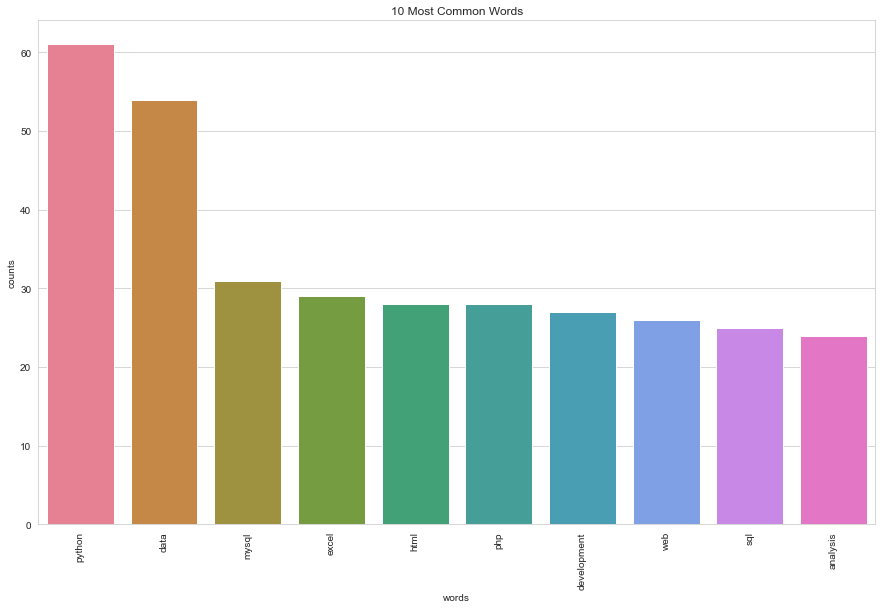

In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    IS_SMU['allSkills']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
python data sql skills communication

Topic #1:
entry tableau python chinese mysql

Topic #2:
development software end data web

Topic #3:
data python analytics javascript web

Topic #4:
python php mysql excel office


## Previous Education - JC and Poly

In [55]:
# Poly DF
# Check Poly - JC distribution. Check the most, any reasons why that Poly? Why that JC?

searchfor = ['Polytechnic', 'Poly']
IS_Poly = IS_SMU[IS_SMU['school2'].str.contains('|'.join(searchfor))]
IS_Poly.shape

(22, 10)

In [ ]:
# JC DF
searchfor = ['Polytechnic', 'Poly']
IS_JC = IS_SMU[IS_SMU['school2'].str.contains('|'.join(searchfor))]
IS_JC.shape

In [ ]:
# Temasek Poly Entries
is_TP = IS_SMU['school2'] == "Temasek Polytechnic"
TP_SMU = IS_SMU[is_TP]
TP_SMU.head()

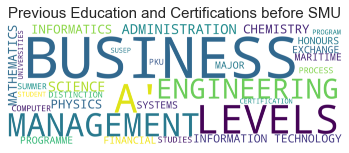

In [52]:
# See the different fields, can say very diverse and SCIS is like "friendly" in the change
stop_words = stopwords.words('english')
stop_words.extend(['no entry', 'diploma', 'diploma in', 'in', 'GCE', 'with', 
                   'merit', 'cambridge', 'international','entry','no', 'level', 
                   'singapore', 'A', "'", 'school', 'bachelor','high', 'general', 'H2'])
content = ''

for x in IS_SMU['schoolDegree2']:
    if len(x.strip()) > 0: # Eliminates empty answers
        content += x.upper() + ' '    

# Create a word cloud
my_wordcloud = WordCloud(background_color='white', max_words = 30, stopwords = stop_words,
                     width=5500,
                     height=2000).generate(content)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Previous Education and Certifications before SMU')
plt.show()